# Wczytujemy dane
Format pliku to `fif`, surowy plik więc będziemy potrzebowali `read_raw_fif` z `mne.io` (podmoduł mne-pythona do operacji input-output).  
Wcześniej za pomocą `os.getcwd` oraz `os.chdir` wejdziemy do folderu z plikiem i wylistujemy sobie jego zawartość korzystając z `os.listdir`.

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\student\\Desktop\\dane'

In [4]:
data_dir = (r'C:\Users\student\Desktop\dane')

os.chdir(data_dir)
os.getcwd()

'C:\\Users\\student\\Desktop\\dane'

In [5]:
files = os.listdir()
print(files)

['.ipynb_checkpoints', 'ds_rest_120-raw.fif', 'Untitled.ipynb', 'Untitled1.ipynb', 'Zajecia_03.ipynb']


In [6]:
import mne

raw = mne.io.read_raw_fif(files[1], preload=True)

Opening raw data file C:\Users\student\Desktop\dane\ds_rest_120-raw.fif...
    Range : 0 ... 134217 =      0.000 ...   536.868 secs
Ready.
Reading 0 ... 134217  =      0.000 ...   536.868 secs...


# Podstawowe informacje pliku

In [7]:
# lista nazw kanałów
print(raw.ch_names)

['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2', 'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8', 'Cz']


In [8]:
# częstotliwość próbkowania
raw.info['sfreq']

250.0

In [9]:
# dane w postaci macierzy kanały na próbki czasowe
data = raw.get_data()
data.shape

(64, 134218)

In [10]:
# czas rejestracji to liczba próbek / częstotliwość próbkowania
time_in_seconds = data.shape[1] / raw.info['sfreq']

print('Rejestracja trwała', time_in_seconds, 'sekund',
      'czyli około', round(time_in_seconds / 60), 'minut.')

Rejestracja trwała 536.872 sekund czyli około 9 minut.


In [11]:
%matplotlib inline

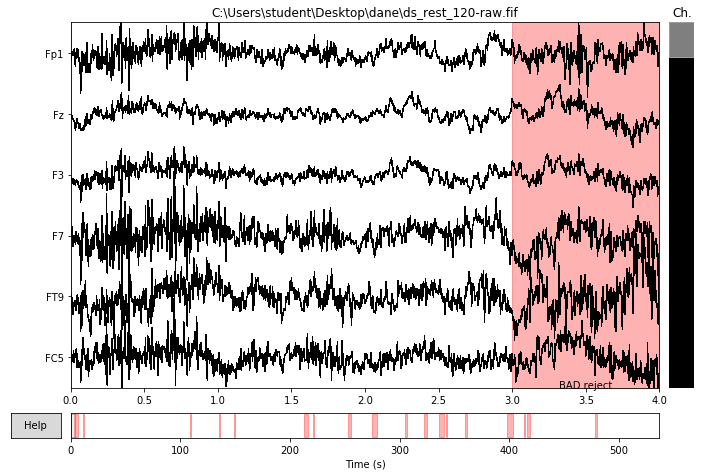

In [12]:
raw.plot(n_channels=6, duration=4.);

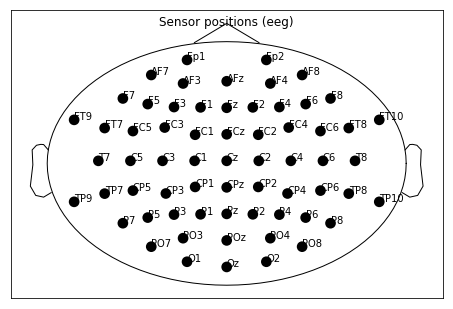

In [13]:
raw.plot_sensors(show_names=True);

In [21]:
chan_idx = raw.ch_names.index('Oz')

In [26]:
import matplotlib.pyplot as plt

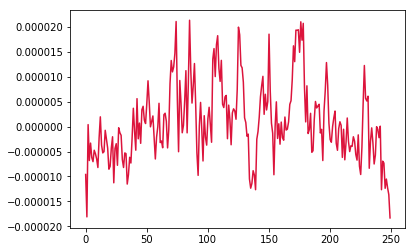

In [16]:
plt.plot(data[chan_idx, 2000:2250], color='crimson')

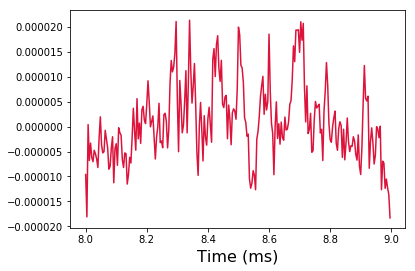

In [17]:
plt.plot(raw.times[2000:2250],
        data[chan_idx, 2000:2250], color='crimson')
plt.xlabel('Time (ms)', fontsize=16)

In [18]:
czas_zamknięcia_oczu = 11.24
próbka_zamknięcia_oczu = czas_zamknięcia_oczu * raw.info['sfreq']
print(próbka_zamknięcia_oczu)

2810.0


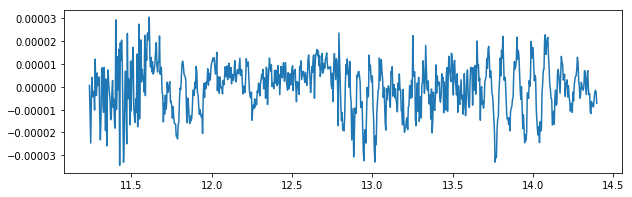

In [19]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(raw.times[2810:3600], data[chan_idx, 2810:3600])

## Plan działania:
* widmo dla 60 sekund po zamknięciu oczu (dla wybranej elektrody)
* wykres dla widma
* widmo dla wycinka 12.5 - 13.5 oraz 13.5 - 14.5
* wykres dla obu widm na jednym wykresie
* parametry widma: `n_fft`, `n_overlap`
* wiele elektrod - wybieramy z użyciem plot_sensors
* wiele elektrod - widmo + wykres
* znajdujemy zakres oscylacji alfa
* wyświetlamy widmo na głowie
* dwa wykresy "główkowe", wykres różnicy

In [20]:
import mne

mne.__version__

'0.14.1'

In [23]:
from mne.time_frequency import psd_welch

psd, freq = psd_welch(raw, picks=chan_idx)

Effective window size : 1.024 (s)


In [35]:
freq.shape

(129,)

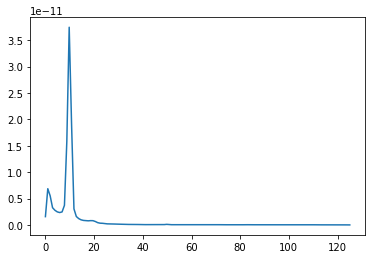

In [38]:
plt.plot(freq, psd[0])

In [57]:
psd_closed, freq = psd_welch(raw, tmin=11.24,
                             tmax=41.24, fmax=25.,
                             picks=chan_idx, n_fft=500,
                            n_overlap=250)

Effective window size : 2.000 (s)


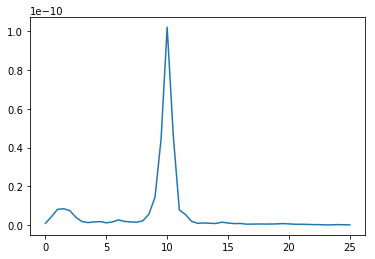

In [54]:
plt.plot(freq, psd_closed[0])

In [58]:
psd_op, freq = psd_welch(raw, tmin=76.332,
                             tmax=76.332+30, fmax=25.,
                             picks=chan_idx, n_fft=500,
                            n_overlap=250)

Effective window size : 2.000 (s)


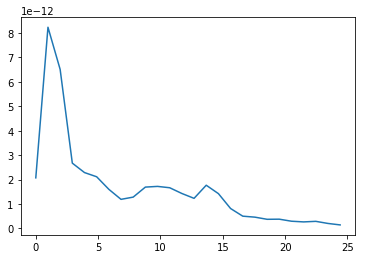

In [50]:
plt.plot(freq, psd_op[0])

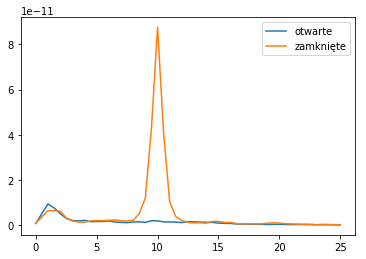

In [59]:
plt.plot(freq, psd_op[0], label='otwarte')
plt.plot(freq, psd_closed[0], label='zamknięte')
plt.legend()

In [60]:
psd, freq = psd_welch(raw)

Effective window size : 1.024 (s)


In [61]:
psd.shape

(64, 129)

In [62]:
psd.T.shape

(129, 64)

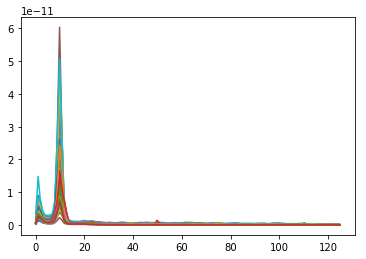

In [64]:
plt.plot(freq, psd.T);

In [71]:
import numpy as np

In [74]:
alpha = np.where(freq >= 10)[0][0]

In [75]:
psd.shape

(64, 129)

In [77]:
alpha_topo = psd[:, alpha]

In [78]:
from mne.viz import plot_topomap

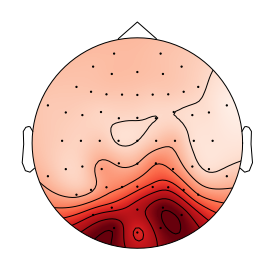

(<matplotlib.image.AxesImage at 0x208667e1a58>,
 <matplotlib.contour.QuadContourSet at 0x20864a05438>)

In [79]:
plot_topomap(alpha_topo, raw.info)